In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv',sep=";")

In [3]:
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
df_test = pd.read_csv('test.csv', sep=";")

In [5]:
df_test.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN


In [6]:
df.shape

(1170511, 29)

In [7]:
df_test.shape

(136786, 27)

In [8]:
for col in df.columns:
    print(col)


WELL
DEPTH_MD
X_LOC
Y_LOC
Z_LOC
GROUP
FORMATION
CALI
RSHA
RMED
RDEP
RHOB
GR
SGR
NPHI
PEF
DTC
SP
BS
ROP
DTS
DCAL
DRHO
MUDWEIGHT
RMIC
ROPA
RXO
FORCE_2020_LITHOFACIES_LITHOLOGY
FORCE_2020_LITHOFACIES_CONFIDENCE


In [9]:
df.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


In [10]:
df_test.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
count,136786.000000,136727.000000,1.367270e+05,136727.000000,131141.000000,39097.000000,136199.000000,136727.000000,119826.000000,136786.000000,...,66627.000000,66964.000000,68316.000000,43220.000000,13515.000000,111556.000000,20269.000000,11316.000000,55790.000000,29848.000000
mean,2501.136889,467884.598172,6.708199e+06,-2397.835918,12.613567,3.137817,3.844914,3.662074,2.324925,65.223264,...,43.528467,10.963364,26.406939,185.389543,0.160979,0.014441,6.028683,4.906861,22.669058,5.280645
std,1043.245788,35865.313917,1.352924e+05,937.001116,3.218969,17.293036,24.170949,23.242750,0.243602,31.146538,...,25.530487,1.839420,31.913763,63.173605,0.536332,0.054151,49.607255,22.963156,13.436052,55.475790
min,227.296008,423237.531250,6.461833e+06,-4362.296387,6.682522,0.255146,0.148474,0.152317,1.289989,6.342400,...,-24.132233,8.500000,0.004297,79.327354,-6.402187,-1.213720,0.129413,0.063258,0.572329,0.262056
25%,1707.948917,442441.406250,6.605454e+06,-3171.749634,9.049458,0.850029,0.933067,0.902655,2.116576,44.557275,...,31.179566,8.500000,12.240131,146.022373,0.027619,-0.001835,0.134206,0.543010,12.753529,1.081298
50%,2471.823595,455904.187500,6.759398e+06,-2442.877197,12.428942,1.416000,1.669926,1.657664,2.376285,60.110472,...,48.967999,12.250001,20.878899,175.515274,0.124714,0.009203,0.143792,1.435970,19.927827,1.587683
75%,3294.643006,485144.859375,6.822772e+06,-1681.509217,14.177558,2.578526,3.088695,2.894494,2.531131,82.757637,...,62.133951,12.250001,31.232986,204.037148,0.247048,0.026884,0.149783,4.425004,29.882400,3.274492
max,5007.417975,548460.437500,6.853315e+06,-205.295288,27.344881,1566.168457,1901.766602,1582.094482,3.073430,500.878357,...,125.522781,17.500000,621.078247,494.096802,7.362912,0.404614,426.921356,957.984436,131.990906,2000.000000


In [11]:
list(df_test.columns)

['WELL',
 'DEPTH_MD',
 'X_LOC',
 'Y_LOC',
 'Z_LOC',
 'GROUP',
 'FORMATION',
 'CALI',
 'RSHA',
 'RMED',
 'RDEP',
 'RHOB',
 'GR',
 'SGR',
 'NPHI',
 'PEF',
 'DTC',
 'SP',
 'BS',
 'ROP',
 'DTS',
 'DCAL',
 'DRHO',
 'MUDWEIGHT',
 'RMIC',
 'ROPA',
 'RXO']

In [12]:

# To find the correlation among
# the columns usmethod ='pearing pearson method
df.corr(method ='pearson')

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
DEPTH_MD,1.000000,-0.078266,0.258393,-0.994761,-0.583351,0.090240,0.055476,0.051349,0.741904,0.098282,...,-0.012061,-0.553110,0.003915,0.000444,0.092773,0.043464,-0.377526,0.003960,-0.007422,-0.082604
X_LOC,-0.078266,1.000000,0.417225,0.086620,-0.119089,0.004157,0.012867,0.071869,0.086809,0.232408,...,0.034295,0.019872,-0.005978,0.003060,-0.048337,-0.015175,0.110223,0.142630,-0.016244,0.085848
Y_LOC,0.258393,0.417225,1.000000,-0.251269,-0.088677,-0.022042,0.030189,-0.085301,0.205928,0.192176,...,0.003498,-0.075089,-0.004558,0.001112,-0.067588,0.021894,-0.066518,-0.003680,-0.018719,-0.006759
Z_LOC,-0.994761,0.086620,-0.251269,1.000000,0.577283,-0.096993,-0.040089,-0.053246,-0.743765,-0.088711,...,0.009979,0.547174,-0.003989,-0.000548,-0.094118,-0.044206,0.386207,-0.002769,0.010507,0.079751
CALI,-0.583351,-0.119089,-0.088677,0.577283,1.000000,-0.011651,-0.042424,-0.030207,-0.570643,-0.240646,...,0.031061,0.480598,0.363297,0.000521,-0.060155,-0.015424,0.192494,-0.123407,0.072317,0.014551
RSHA,0.090240,0.004157,-0.022042,-0.096993,-0.011651,1.000000,0.178316,0.293445,0.078616,-0.074280,...,-0.008611,-0.134674,0.000492,-0.012619,0.044724,0.154494,-0.036224,0.062877,0.059277,0.012168
RMED,0.055476,0.012867,0.030189,-0.040089,-0.042424,0.178316,1.000000,0.131140,-0.008321,-0.015930,...,-0.007477,-0.121113,0.000895,-0.003927,-0.002924,0.050319,-0.068886,0.053110,-0.006774,0.019983
RDEP,0.051349,0.071869,-0.085301,-0.053246,-0.030207,0.293445,0.131140,1.000000,-0.039025,-0.097851,...,-0.005882,-0.096708,0.002652,-0.000086,0.000768,0.046408,-0.005252,0.078216,0.080111,-0.017818
RHOB,0.741904,0.086809,0.205928,-0.743765,-0.570643,0.078616,-0.008321,-0.039025,1.000000,0.165372,...,-0.008136,-0.694566,-0.024122,0.001683,0.036123,0.055732,-0.419315,0.044904,0.073774,-0.048642
GR,0.098282,0.232408,0.192176,-0.088711,-0.240646,-0.074280,-0.015930,-0.097851,0.165372,1.000000,...,0.036946,0.126999,-0.002210,0.000988,0.000666,-0.021022,-0.063477,-0.050393,0.163939,0.036349


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

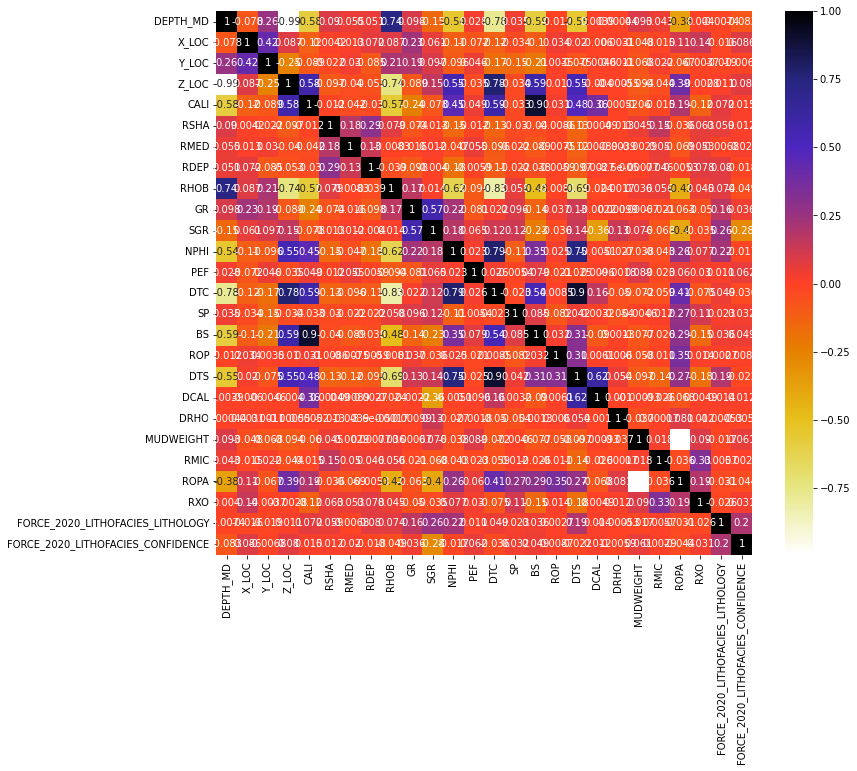

In [14]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr(method ='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Inspecting available logs and interpretations
The data contains the metadata columns

WELL: well name
DEPTH_MD: measured depth
X_LOC: UTM X coordinate
Y_LOC: UTM Y coordinate
Z_LOC: DEPTH
GROUP: NPD lithostratigraphy group
FORMATION: NPD lithostratgraphy formation
The data contains the well log curves. For example the following:

BS: Bit Size
CALI: Caliper
RDEP: Deep Resistivity
RHOB: Bulk Density
GR: Raw gamma data
SGR: Spectral Gamma Ray
RMED: Medium Resistivity
ROP: Rate of Penetration
NPHI: Neutron Porosity
PEF: Photoelectric Absorption Factor
RSHA: Shallow Resistivity
DTS: Sonic (Sheer Slowness)
DTC: Sonic (Compressional Slowness)
See contest page for full list.

as well as the interpretation

FORCE_2020_LITHOFACIES_LITHOLOGY: lithology class label
FORCE_2020_LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)

In [15]:
wells = df['WELL'].unique()

In [16]:
wells

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

#The LITHOLOGY column¶

In [17]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [18]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000], dtype=int64)

Lithologies are not equally likely. This is reflected in this dataset.

C:\Users\dhiraj\AppData\Local\Temp/ipykernel_7976/184528555.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation=45)


Text(0, 0.5, 'Lithology presence (\\%)')

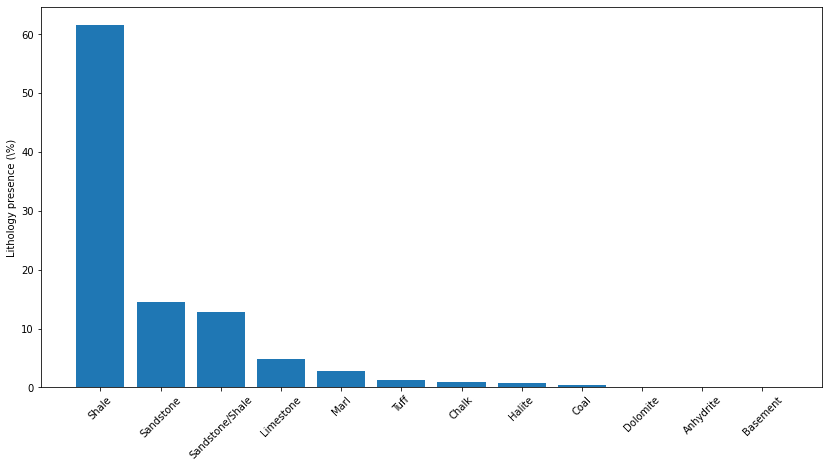

In [19]:
counts = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')

# Missing logs¶

Notice that some of the curves are NaN. This is an imporant aspect of this dataset and of this competition. The only log columns that are guaranteed to be present are WELL, DEPT, and GR. All other logs can (and will) be missing from some parts of the dataset.

In [20]:
df.isna().any()

WELL                                 False
DEPTH_MD                             False
X_LOC                                 True
Y_LOC                                 True
Z_LOC                                 True
GROUP                                 True
FORMATION                             True
CALI                                  True
RSHA                                  True
RMED                                  True
RDEP                                  True
RHOB                                  True
GR                                   False
SGR                                   True
NPHI                                  True
PEF                                   True
DTC                                   True
SP                                    True
BS                                    True
ROP                                   True
DTS                                   True
DCAL                                  True
DRHO                                  True
MUDWEIGHT  

In [21]:
df.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

The following plot shows how large a percentage of training data wells contain at least some depth interval with the given logs. As you can see a couple of logs like RT and DTS are present in less than half of the training wells. Remember, the test data will have a similar distribution of available logs

C:\Users\dhiraj\AppData\Local\Temp/ipykernel_7976/3376576080.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns[2:-2], rotation=45)


Text(0, 0.5, 'Well presence (\\%)')

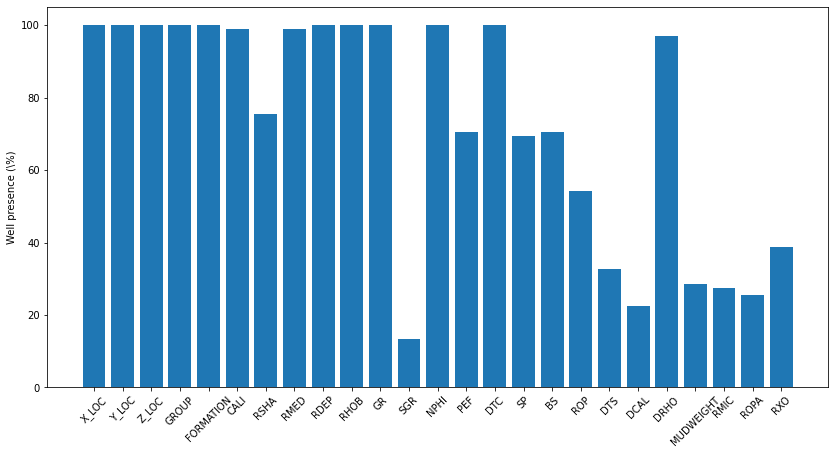

In [22]:
occurences = np.zeros(25)
for well in df['WELL'].unique():
    occurences += df[df['WELL'] == well].isna().all().astype(int).values[2:-2]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(df.WELL.unique().shape[0]-occurences)/df.WELL.unique().shape[0]*100.0)
ax.set_xticklabels(df.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_ylabel('Well presence (\%)')

# Look at some log curves for a couple of wells

(3272.024, 494.528)

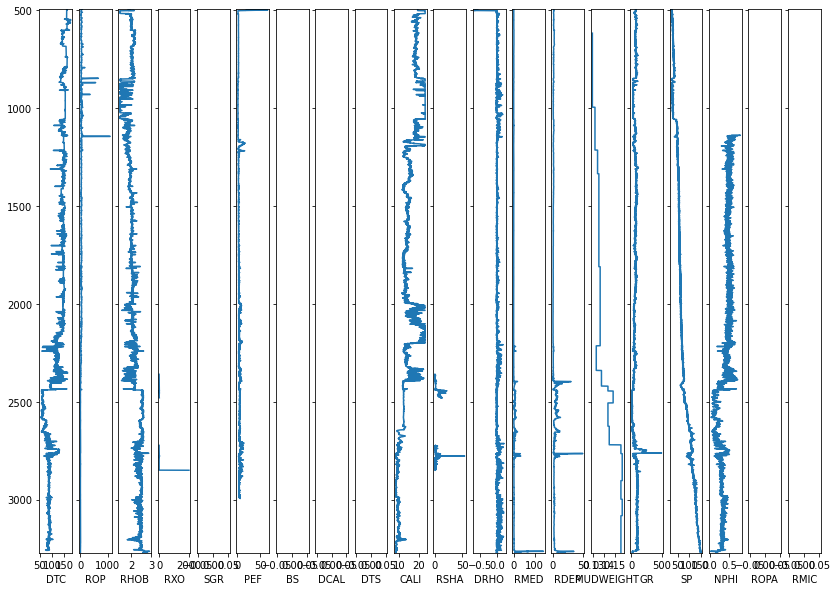

In [23]:
well_data = df[df['WELL'] == wells[0]]
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(14, 10), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])):
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])

(4422.0172, 2484.1692)

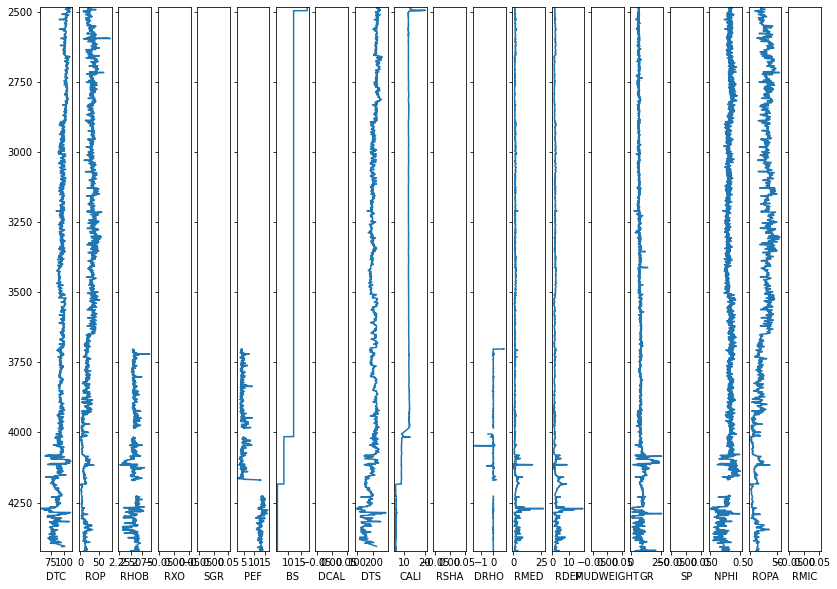

In [24]:
well_data = df[df['WELL'] == wells[57]]
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(14, 10), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])):
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])

# Preparing data for training

In [26]:
X = df.drop(columns=['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'])

As a simple approach we replace nan with zero and hope for the best

In [27]:
X.fillna(0, inplace=True)

# y as target col preparing

We should convert lithology labels to numbers 0-11 before training

In [57]:
criteria1 = [df['FORCE_2020_LITHOFACIES_LITHOLOGY'].between(0, 30000),
             df['FORCE_2020_LITHOFACIES_LITHOLOGY'].between(65000, 65030),
             df['FORCE_2020_LITHOFACIES_LITHOLOGY'].between(70000, 74000),
             df['FORCE_2020_LITHOFACIES_LITHOLOGY'].between(80000, 99000)]
values = [0,1, 2, 3]

In [58]:
df['LITHO_NUMBER']=np.select(criteria1, values, 0)

In [60]:
df

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITHO_NUMBER
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,1
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,1
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,1
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,1
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0,0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0,1
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0,1
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0,1


In [61]:
y = df['LITHO_NUMBER']

In [63]:
y.describe()

count    1.170511e+06
mean     1.019798e+00
std      6.431548e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: LITHO_NUMBER, dtype: float64

In [28]:
#y = df['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [29]:
# #lithology_numbers = {30000: 0,
#                  65030: 1,
#                  65000: 2,
#                  80000: 3,
#                  74000: 4,
#                  70000: 5,
#                  70032: 6,
#                  88000: 7,
#                  86000: 8,
#                  99000: 9,
#                  90000: 10,
#                  93000: 11}

In [30]:
# y = y.map(lithology_numbers)

Lithologies are not equally likely. Probably smart to take this into account by computing class weights

In [31]:
np.bincount(y)

array([168937, 150455, 720803,  33329,   1688,  56320,  10513,   8213,
         1085,  15245,   3820,    103], dtype=int64)

Shuffle the data

In [32]:
from sklearn.utils import shuffle

In [33]:
X, y = shuffle(X, y, random_state=42)

In [34]:
X

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
30423,2343.304000,436806.46875,6463010.5,-2318.007324,ROGALAND GP.,Lista Fm.,14.882113,0.771240,0.771240,0.662699,...,88.208725,12.250001,12.761565,0.000000,2.632109,0.115312,0.143792,0.000000,0.000000,0.57085
1073159,3582.467851,543919.75000,6856653.5,-3477.858154,CROMER KNOLL GP.,Roedby Fm.,8.645628,0.000000,5.599961,4.988578,...,0.000000,8.500000,10.556081,150.206314,0.000000,-0.007215,0.000000,6.627153,10.410796,0.00000
436368,734.814000,483545.34375,6590313.0,-709.762207,NORDLAND GP.,Utsira Fm.,0.000000,0.000000,0.000000,1.000559,...,0.000000,17.500000,109.271744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
290688,1075.968000,487291.25000,6643945.0,-1053.937988,HORDALAND GP.,0,17.646826,0.000000,0.867609,1.231773,...,21.596836,17.500000,7.970956,0.000000,0.215513,0.051340,0.958611,0.000000,0.000000,0.00000
1118085,3580.061600,537897.75000,6791142.5,-3069.179688,BAAT GP.,Rannoch Fm.,8.572706,0.000000,7.634528,8.066478,...,0.000000,8.500000,31.773550,140.671463,0.000000,0.039784,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,2619.545201,0.00000,0.0,0.000000,ZECHSTEIN GP.,Smith Bank Fm.,12.437759,0.000000,0.000000,0.000000,...,0.000000,12.250001,2.385924,0.000000,0.000000,0.000000,1.425934,0.000000,0.000000,0.00000
259178,3032.057901,476870.34375,6625402.0,-3008.017822,VIKING GP.,Draupne Fm.,12.151999,1.934554,1.315825,1.341654,...,58.382977,12.250001,0.000000,0.000000,-0.098000,0.037645,0.000000,0.000000,0.000000,0.00000
131932,2015.638396,476768.28125,6523588.5,-1989.272949,HEGRE GP.,Skagerrak Fm.,8.527798,0.000000,1.631037,1.619809,...,0.000000,8.500000,9.060954,172.162643,0.000000,-0.001382,0.000000,0.000000,0.000000,0.00000
671155,1424.414000,530753.68750,6732068.0,-1380.430908,ROGALAND GP.,Lista Fm.,0.000000,0.000000,0.000000,0.576554,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [35]:

# To find the correlation among
# the columns usmethod ='pearing pearson method
X.corr(method ='pearson')

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
DEPTH_MD,1.000000,-0.014731,0.089042,-0.976459,-0.226756,0.068582,0.055021,0.051416,0.446856,0.098282,...,-0.055295,-0.034638,-0.011420,0.186341,0.002131,0.000559,0.016903,0.026373,0.036882,-0.012650
X_LOC,-0.014731,1.000000,0.836345,-0.115582,-0.107853,-0.048626,0.013448,0.050035,0.177229,0.239784,...,0.019977,-0.063797,0.008604,0.147432,-0.002749,0.001842,-0.039413,0.009863,0.080601,0.046972
Y_LOC,0.089042,0.836345,1.000000,-0.250937,0.016072,-0.058569,0.013803,-0.007897,0.158241,0.162808,...,0.047677,-0.084355,-0.001791,0.078022,-0.000131,0.000343,-0.029773,0.005321,0.060901,-0.013819
Z_LOC,-0.976459,-0.115582,-0.250937,1.000000,0.218367,-0.058152,-0.040614,-0.053931,-0.461257,-0.112329,...,0.030706,0.049262,0.009626,-0.179386,-0.002604,-0.000665,-0.015043,-0.026901,-0.031614,0.016023
CALI,-0.226756,-0.107853,0.016072,0.218367,1.000000,0.004621,-0.020117,-0.007311,-0.027026,-0.249205,...,0.107124,0.136169,0.021600,-0.072045,-0.000265,-0.001738,-0.008254,-0.009586,-0.068854,-0.075307
RSHA,0.068582,-0.048626,-0.058569,-0.058152,0.004621,1.000000,0.066090,0.188120,0.043293,-0.056791,...,-0.022389,0.008089,-0.002911,-0.024209,0.000211,-0.000134,0.000805,0.012441,-0.020629,0.024724
RMED,0.055021,0.013448,0.013803,-0.040614,-0.020117,0.066090,1.000000,0.040238,0.022284,-0.013467,...,-0.019689,-0.028769,-0.003993,-0.005308,0.000127,-0.003892,-0.003472,0.009792,-0.010712,0.012745
RDEP,0.051416,0.050035,-0.007897,-0.053931,-0.007311,0.188120,0.040238,1.000000,0.019878,-0.095631,...,-0.040298,-0.053453,-0.002161,-0.021077,-0.000145,-0.000063,0.008739,0.011204,-0.014347,0.024029
RHOB,0.446856,0.177229,0.158241,-0.461257,-0.027026,0.043293,0.022284,0.019878,1.000000,0.039454,...,0.001933,-0.095229,0.008319,0.090186,-0.004370,0.001502,0.007186,0.021145,0.060835,-0.048242
GR,0.098282,0.239784,0.162808,-0.112329,-0.249205,-0.056791,-0.013467,-0.095631,0.039454,1.000000,...,0.004156,0.064245,0.029336,0.186352,-0.002432,0.000862,-0.011760,0.003446,0.119934,-0.025907


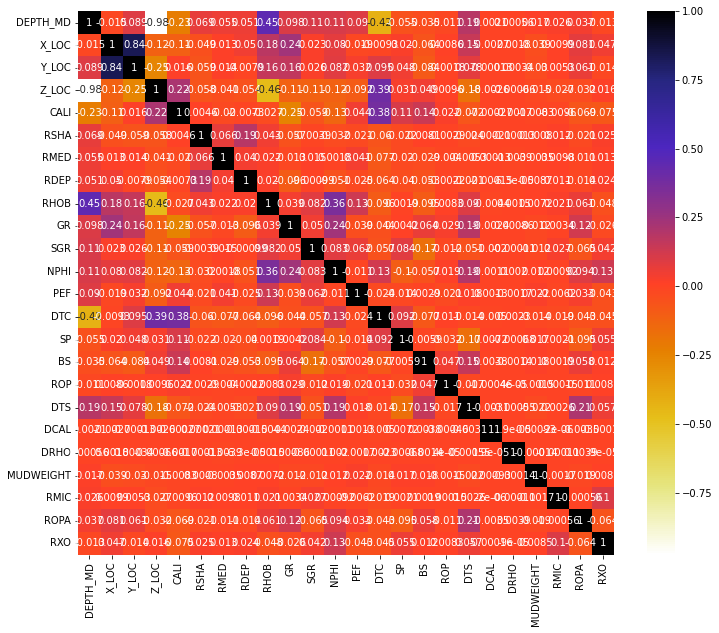

In [36]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr(method ='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [37]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

2

In [39]:
corr_features

{'Y_LOC', 'Z_LOC'}

# Preparing X col

Select only the columns you want to use

In [40]:
X.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI',
       'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP',
       'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'],
      dtype='object')

In [41]:
X = X[['RHOB','NPHI', 'GR', 'DTC', 'DTS']]

In [42]:
#testing
X.columns.values

array(['RHOB', 'NPHI', 'GR', 'DTC', 'DTS'], dtype=object)

# Testing corr 

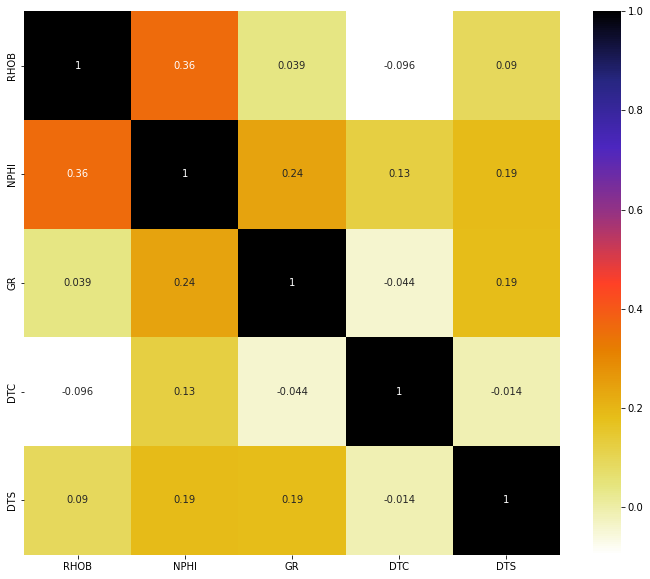

In [43]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr(method ='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [44]:
corr_features2 = correlation(X, 0.1)
len(set(corr_features2))

4

In [45]:
corr_features2

{'DTC', 'DTS', 'GR', 'NPHI'}

In [46]:
corr_features3 = correlation(X, 0.2)
len(set(corr_features3))

2

In [47]:
corr_features3

{'GR', 'NPHI'}

In [48]:
corr_features4 = correlation(X, 0.4)
len(set(corr_features4))

0

In [49]:
corr_features4

set()

# testin on


RHOB, NPHI, GR, DTC, DTS

In [50]:
#X=X[['RSHA','RDEP','PEF','SP','BS']]

In [51]:
X.columns

Index(['RHOB', 'NPHI', 'GR', 'DTC', 'DTS'], dtype='object')

In [52]:
X.head()

,RHOB,NPHI,GR,DTC,DTS
30423,2.212606,0.399297,66.807358,121.575783,0.000000
1073159,2.648031,0.174108,93.301193,63.601940,150.206314
436368,0.000000,0.000000,55.920452,0.000000,0.000000
290688,2.044336,0.000000,41.795280,148.782700,0.000000
1118085,2.573311,0.257259,126.820572,77.505989,140.671463


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:

scaler = StandardScaler()

In [55]:
X.describe()

,RHOB,NPHI,GR,DTC,DTS
count,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06
mean,1.970169e+00,2.170756e-01,7.091370e+01,1.055269e+02,3.052977e+01
std,8.219236e-01,1.899292e-01,3.423149e+01,4.078841e+01,7.790671e+01
min,0.000000e+00,-3.582247e-02,1.092843e-01,0.000000e+00,0.000000e+00
25%,2.000454e+00,0.000000e+00,4.762722e+01,8.372287e+01,0.000000e+00
50%,2.243782e+00,2.352654e-01,6.836763e+01,1.053288e+02,0.000000e+00
75%,2.462978e+00,3.653732e-01,8.903551e+01,1.393171e+02,0.000000e+00
max,3.457820e+00,9.995703e-01,1.076964e+03,3.204789e+02,6.765781e+02


In [56]:
#testing
X.shape

(1170511, 5)

In [64]:
y.shape

(1170511,)

In [65]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1170506    0
1170507    1
1170508    1
1170509    1
1170510    1
Name: LITHO_NUMBER, Length: 1170511, dtype: int32

In [66]:
X = scaler.fit_transform(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
#testing
# separate dataset into train and test
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#    X,
 #   y,
  #  test_size=0.3,
   # random_state=0)

X_train.shape, X_test.shape

((819357, 5), (351154, 5))

# Algo for Training

In [69]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1170506    0
1170507    1
1170508    1
1170509    1
1170510    1
Name: LITHO_NUMBER, Length: 1170511, dtype: int32

using knn

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=1)

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
pred = knn.predict(X_test)

In [74]:
#testing
### check accuracy
from sklearn.metrics import accuracy_score

In [75]:
#testing score
score=accuracy_score(y_test,pred)

In [76]:
# score value
score

0.5810299754523657

# Choosing a K Value

In [77]:
error_rate = []

# Will take some time
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

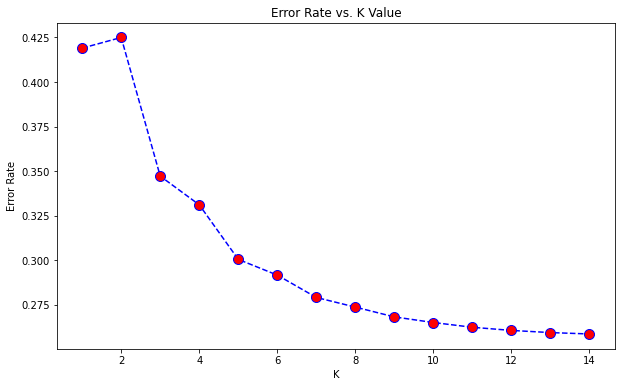

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [87]:
knn = KNeighborsClassifier(n_neighbors=14)

In [88]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [89]:
pred = knn.predict(X_test)

In [90]:
#testing score
score=accuracy_score(y_test,pred)
score

0.7413812743126947

# Final testing and model dump

In [91]:
knn.predict([[1,-0.2,320,110,150]])

array([1])

# model dump

In [93]:
import pickle

In [94]:
pickle.dump(knn, open('knnModel.pkl', 'wb'))